In [ ]:
# Q2 part a)
# Jincheng Zhang, jz2918
# tuts source: https://nbviewer.jupyter.org/github/QISKit/qiskit-tutorial/blob/stable/2_quantum_information/quantum_teleportation.ipynb
# helper module python code created by me: drawcircuit, Qconfig
# drawcircuit code source: https://nbviewer.jupyter.org/github/QISKit/qiskit-tutorial/blob/stable/1_introduction/getting_started.ipynb

In [1]:
# Checking the version of PYTHON; we only support > 3.5
import sys
if sys.version_info < (3,5):
    raise Exception('Please use Python version 3.5 or greater.')

import numpy as np

# Importing QISKit
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

# Import basic plotting tools
from qiskit.tools.visualization import plot_histogram

#custom
import drawcircuit as dc

# Quantum program setup 
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config['url']) # set the APIToken and API url

In [2]:
# Creating registers
q = Q_program.create_quantum_register('q', 3)
c0 = Q_program.create_classical_register('c0', 1)
c1 = Q_program.create_classical_register('c1', 1)
c2 = Q_program.create_classical_register('c2', 1)

# Quantum circuit to make the shared entangled state 
teleport = Q_program.create_circuit('teleport', [q], [c0,c1,c2])
teleport.h(q[1])
teleport.cx(q[1], q[2])

In [3]:
teleport.u3(0.3, 0.2, 0.1, q[0])

In [4]:
teleport.cx(q[0], q[1])
teleport.h(q[0])
teleport.barrier()

In [5]:
teleport.measure(q[0], c0[0])
teleport.measure(q[1], c1[0])

In [6]:
teleport.z(q[2]).c_if(c0, 1)
teleport.x(q[2]).c_if(c1, 1)

In [7]:
teleport.measure(q[2], c2[0])

In [8]:
circuits = ['teleport']
print(Q_program.get_qasms(circuits)[0])

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c0[1];
creg c1[1];
creg c2[1];
h q[1];
cx q[1],q[2];
u3(0.300000000000000,0.200000000000000,0.100000000000000) q[0];
cx q[0],q[1];
h q[0];
barrier q[0],q[1],q[2];
measure q[0] -> c0[0];
measure q[1] -> c1[0];
if(c0==1) z q[2];
if(c1==1) x q[2];
measure q[2] -> c2[0];



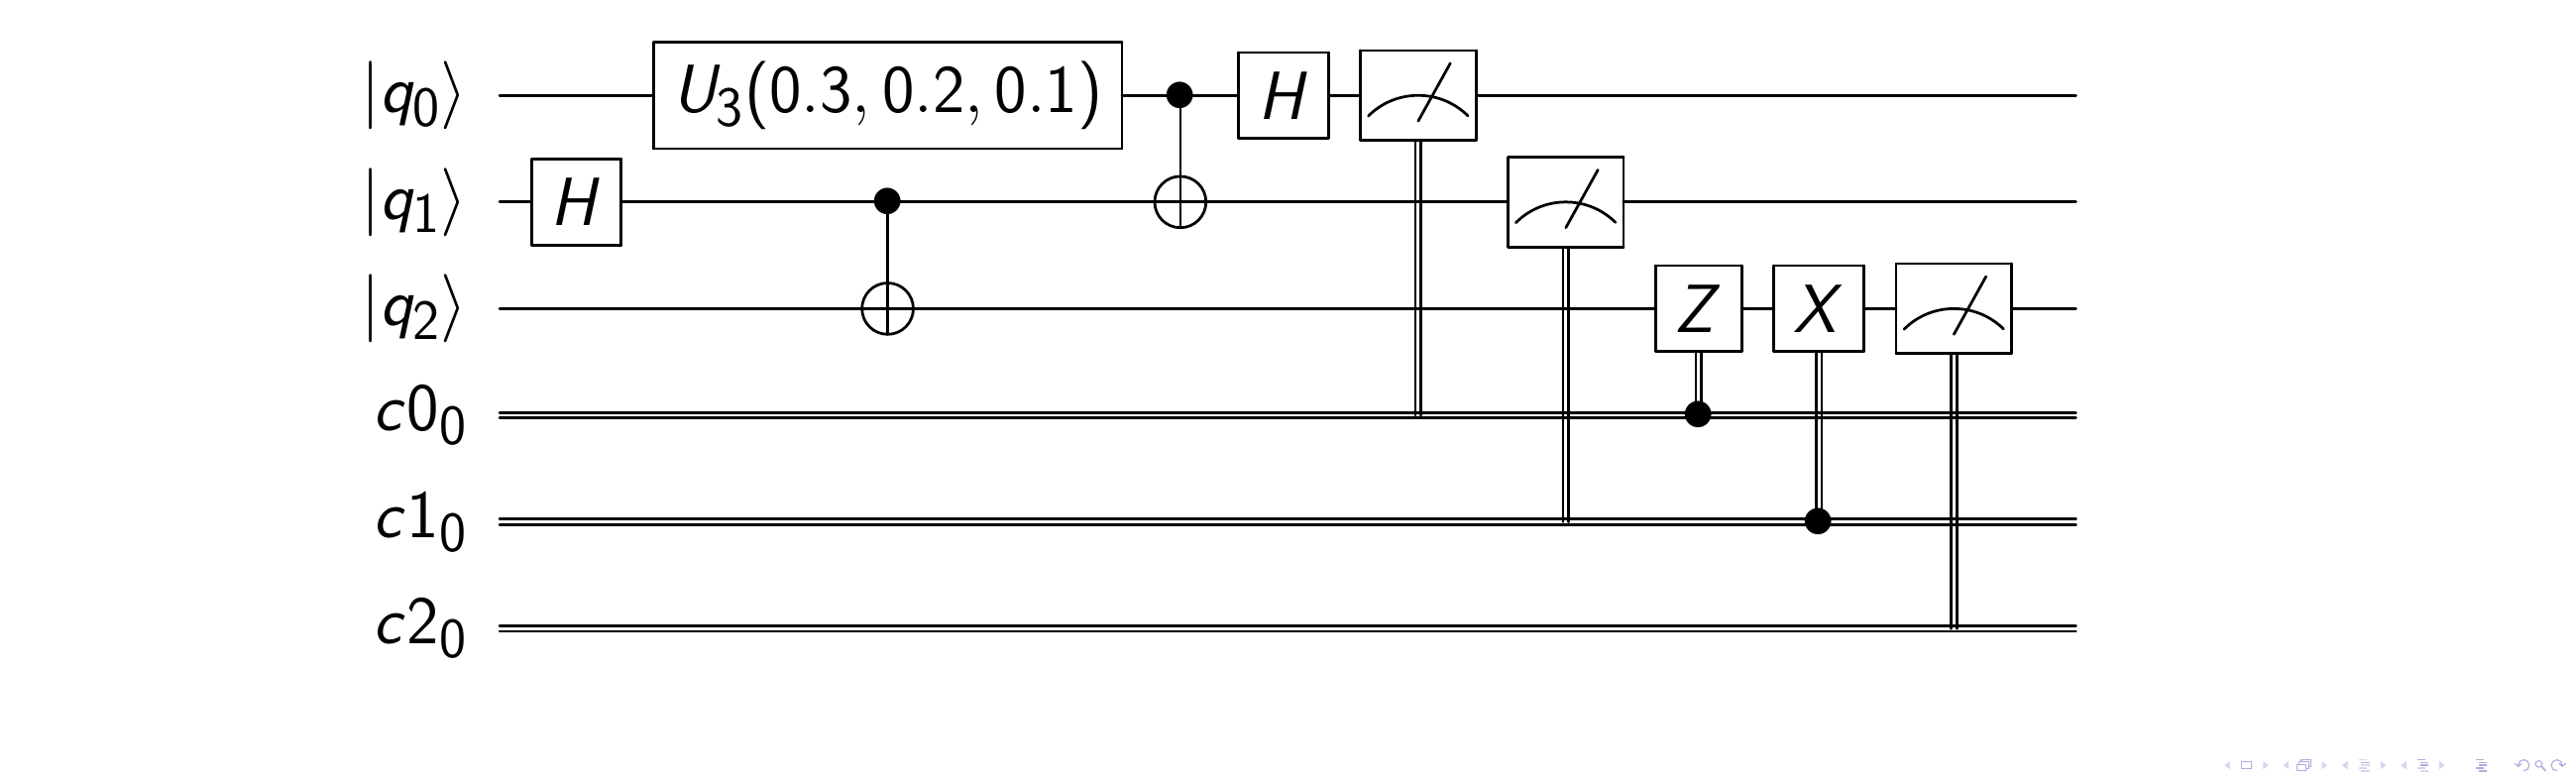

In [9]:
dc.drawCircuit(teleport)

In [10]:
# backend = 'ibmqx2' # the backend to run on
backend = 'local_qasm_simulator' 
shots = 1024 # the number of shots in the experiment 

result = Q_program.execute(circuits, backend=backend, shots=shots, max_credits=3, wait=10, timeout=240)

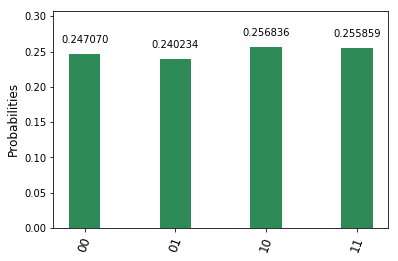

In [11]:
data = result.get_counts('teleport')
alice = {}
alice['00'] = data['0 0 0'] + data['1 0 0']
alice['10'] = data['0 1 0'] + data['1 1 0']
alice['01'] = data['0 0 1'] + data['1 0 1']
alice['11'] = data['0 1 1'] + data['1 1 1']
plot_histogram(alice)

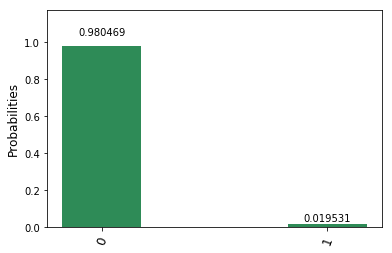

In [12]:
bob = {}
bob['0'] = data['0 0 0'] + data['0 1 0'] +  data['0 0 1'] + data['0 1 1']
bob['1'] = data['1 0 0'] + data['1 1 0'] +  data['1 0 1'] + data['1 1 1']
plot_histogram(bob)